<a href="https://colab.research.google.com/github/nivethsaran/PythonForDataScience/blob/master/e_commerce_recommender_casestudy_fods_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FODS Case Study - E-Commerce Recommender System Dataset Analysis

# About the dataset

**This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. It also contains a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.**

### Importing Libraries

In [215]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing 
from matplotlib.cm import get_cmap
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from scipy.stats import t
from scipy.stats import chi2_contingency

sns.set(style="darkgrid")
from IPython.display import display
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import colorlover as cl
import string
import requests
import json
import urllib
import time
%matplotlib inline
import os

# 1. Data Preprocessing (Review 1)

#### Reading the Dataset

In [216]:
customers=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_customers_dataset.csv")
geolocation=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_geolocation_dataset.csv" )
orderitems=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_order_items_dataset.csv" )
orderpayments=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_order_payments_dataset.csv" )
orderreviews=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_order_reviews_dataset.csv" )
orders=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_orders_dataset.csv" )
products=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_products_dataset.csv")
sellers=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_sellers_dataset.csv")
categoryname=pd.read_csv("https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/product_category_name_translation.csv")
sellerlocation = pd.read_csv('https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/olist_sellers_geolocation.csv')
df_list=[customers,geolocation,orderitems,orderpayments,orderreviews,orders,products,sellers,categoryname,sellerlocation]
filenamelist=['customers','geolocation','orderitems','orderpayments','orderreviews','orders','products','sellers','categoryname','sellerlocation']
stateconn=pd.read_html('https://brazil-help.com/brazilian_states.htm')
state_abbrevations=stateconn[2].iloc[2:,0:2]
state_abbrevations.reset_index(drop=True,inplace=True)
state_abbrevations.columns =['customer_state', 'state_name']
state_abbrevations.head(3)

,customer_state,state_name
0,AC,Acre
1,AL,Alagoas
2,AP,Amapá


In [217]:
# Code for creating the seller_geolocation_dataset
# er=0
# listtemp=[]
# for i in dataset['seller_city'].unique():
#   time.sleep(1)
#   jsonout= requests.get('https://geocode.xyz/'+i+',Brazil?json=1')
#   jsonout=json.loads(jsonout)
#   print(jsonout)
#   if(jsonout.status_code==200):
#     jsonout=json.loads(jsonout.content)
#     listtemp.append([i,jsonout['latt'],jsonout['longt']])
#     print(i+':Success')
#   else:
#     print(i+':Error')
#     er+=1
#   print(jsonout['longt']+' '+jsonout['latt'])
#   print(i)

# print(listtemp)

# tempdf= pd.DataFrame(listtemp)
# tempdf.to_csv('tempdf')

# jsonout= requests.get('https://geocode.xyz/'+i+',Brazil?json=1')
# #   jsonout=json.loads(jsonout)
# print(jsonout.status_code)

# print(er)


# tempdf2= pd.DataFrame(listtemp,columns=tempdf.columns)
# tempdf2['seller_lat']=tempdf2['seller_lat'].astype('float')
# tempdf2['seller_long']=tempdf2['seller_long'].astype('float')
# tempdf.to_csv('tempdf.csv')

# finaltempdf= pd.concat([tempdf,tempdf2])

# finaltempdf.head()

# finaltempdf.to_csv('finaltempdf.csv')

### Printing the dimensions of the dataset

In [218]:
print(len(filenamelist))
print("Dataset Shapes")
for i in range(len(df_list)):
    print(filenamelist[i]+' :'+str(df_list[i].shape))

10
Dataset Shapes
customers :(99441, 5)
geolocation :(1000163, 5)
orderitems :(112650, 7)
orderpayments :(103886, 5)
orderreviews :(100000, 7)
orders :(99441, 8)
products :(32951, 9)
sellers :(3095, 4)
categoryname :(71, 2)
sellerlocation :(581, 4)


### Overview of all datasets

In [219]:
for i in df_list:
    display(i.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


,Unnamed: 0,seller_city,seller_lat,seller_long
0,0,volta redonda,-22.50719,-44.09579
1,1,santos,-23.95233,-46.33457
2,2,rio de janeiro,-22.89286,-43.39352
3,3,sao paulo,-10.54420,-37.54154
4,4,curitiba,-25.46908,-49.27440


### Summary of all the datasets

In [220]:
for i in df_list:
    display(i.describe(include='all'))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,fabf96df570f9397309836fd077c8ad0,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.000000,11715,41753,100000,100000
unique,99173,99441,NaN,4600,36921,637,99010
top,e44840754f12fad2b8646712121b349a,8e17072ec97ce29f0e1f111e598b0c85,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,426,230,466,4
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,4edb2debfd66979e4c68897c768c36b8,fabf96df570f9397309836fd077c8ad0,delivered,2017-11-20 11:46:30,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-02 00:26:45,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,c6bc6e6265a9e3e202b0e843c983e77f,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,c3cfdc648177fdbbbb35635a37472c53,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,musica,fashion_sport
freq,1,1


,Unnamed: 0,seller_city,seller_lat,seller_long
count,581.000000,581,581.000000,581.000000
unique,NaN,581,NaN,NaN
top,NaN,marilia,NaN,NaN
freq,NaN,1,NaN,NaN
mean,264.254733,NaN,-21.842992,-46.775267
std,165.875069,NaN,5.969825,9.279180
min,0.000000,NaN,-32.084210,-63.893400
25%,118.000000,NaN,-24.554170,-49.951230
50%,263.000000,NaN,-22.761380,-47.567660
75%,408.000000,NaN,-20.734620,-44.889110


### Checking for NA Values in datasets and cleaning them

In [221]:
sno=0
for i in df_list:
    print(str(sno)+','+filenamelist[sno]+':  '+str(i.isnull().sum().sum()))
    sno+=1

0,customers:  0
1,geolocation:  0
2,orderitems:  0
3,orderpayments:  0
4,orderreviews:  146532
5,orders:  4908
6,products:  2448
7,sellers:  0
8,categoryname:  0
9,sellerlocation:  0


#### Preprocessing on Customers ad Geolocation Dataframe

In [222]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [223]:
customer_geolocation = pd.merge(customers,geolocation,how='left',right_on=['geolocation_zip_code_prefix','geolocation_city' ,'geolocation_state'], left_on=['customer_zip_code_prefix','customer_city','customer_state'],sort=False)
customer_geolocation.drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state'],inplace=True)

In [224]:
customer_geolocation.drop_duplicates(subset ="customer_unique_id",inplace=True,keep="first")
customer_geolocation=customer_geolocation[~customer_geolocation['geolocation_lat'].isnull()]
customer_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
147,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
300,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310
387,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
520,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073


#### Cleaning order items dataframe

In [225]:
orderitems['shipping_limit_date'],orderitems['shipping_limit_time'] = orderitems['shipping_limit_date'].str.split(' ').str
orderitems.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,13:57:51


#### Cleaning orderpayments dataframe

In [226]:
orderpayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Cleaning orderreviews Dataframe

In [227]:
orderreviews['review_comment_title'].fillna('No_Title',inplace=True)
orderreviews['review_comment_message'].fillna('No_Message',inplace=True)
display(orderreviews.head())
display(orderreviews.isnull().sum())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No_Title,No_Message,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No_Title,No_Message,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No_Title,No_Message,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No_Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No_Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Cleaning Orders Dataframe

In [228]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [229]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at']=pd.to_datetime(orders['order_approved_at'])
orders['order_approved_at'].fillna(orders['order_purchase_timestamp']+pd.to_timedelta(2,unit='h'),inplace=True)
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [230]:
orders.dropna(how='any',inplace=True)
print(len(orders))
orders.isnull().sum()


96475


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Cleaning products dataframe

In [231]:
products.rename(columns={'product_name_lenght':'product_name_length','product_description_lenght':'product_description_length'},inplace=True)

In [232]:
products=products[~products['product_weight_g'].isnull()]
products=products[~products['product_photos_qty'].isnull()]
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [233]:
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [234]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [235]:
orderpayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [236]:
customer_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
147,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
300,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310
387,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
520,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073


In [237]:
orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,13:57:51


In [238]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [239]:
categoryname.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Merging necessary dataframes to create the necessary dataset

In [240]:
orderdetails = orderitems.merge(products,on='product_id')
orderdetails = orderdetails.merge(sellers,on='seller_id')
orderdetails = orderdetails.merge(orders,on='order_id')
orderdetails = orderdetails.merge(customer_geolocation,on='customer_id')
orderdetails = orderdetails.merge(orderpayments,on='order_id')
orderdetails = orderdetails.merge(sellerlocation,on='seller_city')

In [241]:
orderdetails.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
shipping_limit_time              0
product_category_name            0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

In [242]:
# orderdetails.to_csv('review2.csv')

# Preprocessing (Start of Review 2) (17337)

In [243]:
dataset = pd.read_csv('https://raw.githubusercontent.com/nivethsaran/PythonForDataScience/master/FODS_CASESTUDY_DATASET/completeorderdetails.csv')

In [244]:
dataset= dataset[dataset['order_status']=='delivered']
dataset.drop(labels=['payment_type','payment_sequential','payment_installments', 'payment_value','seller_zip_code_prefix','customer_zip_code_prefix','Unnamed: 0.1','Unnamed: 0','order_status','order_id','order_item_id','product_id','seller_id','customer_id','customer_unique_id'],axis=1,inplace=True)

In [245]:
dataset['product_category_name'] = dataset['product_category_name'].str.replace(' ', '')
dataset['product_category_name'] = dataset['product_category_name'].str.replace(r'[^\w\s]', '')

In [246]:
dataset['order_approved_at']= pd.to_datetime(dataset['order_approved_at'])
dataset['order_purchase_timestamp']= pd.to_datetime(dataset['order_purchase_timestamp'])
dataset['order_delivered_carrier_date']= pd.to_datetime(dataset['order_delivered_carrier_date'])
dataset['order_delivered_customer_date']= pd.to_datetime(dataset['order_delivered_customer_date'])
dataset['order_estimated_delivery_date']= pd.to_datetime(dataset['order_estimated_delivery_date'])
dataset['shipping_limit_date']= pd.to_datetime(dataset['shipping_limit_date'])

dataset['order_approval_time']=dataset['order_approved_at']-dataset['order_purchase_timestamp']
dataset['order_approval_time']=dataset['order_approval_time']/pd.Timedelta(hours=1)

dataset['order_carrier_delivery_time']=dataset['order_delivered_carrier_date']-dataset['order_purchase_timestamp']
dataset['order_carrier_delivery_time']=dataset['order_carrier_delivery_time']/np.timedelta64(1,'D')

dataset['order_customer_delivery_time']=dataset['order_delivered_customer_date']-dataset['order_purchase_timestamp']
dataset['order_customer_delivery_time']=dataset['order_customer_delivery_time']/np.timedelta64(1,'D')

dataset['order_estimated_delivery_time']=dataset['order_estimated_delivery_date']-dataset['order_purchase_timestamp']
dataset['order_estimated_delivery_time']=dataset['order_estimated_delivery_time']/np.timedelta64(1,'D')

dataset['shipping_limit_time']=dataset['shipping_limit_date']-dataset['order_purchase_timestamp']
dataset['shipping_limit_time']=dataset['shipping_limit_time']/np.timedelta64(1,'D')

dataset.drop(labels=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date'],axis=1,inplace=True)

one_hot_encoded_dataset=pd.concat([dataset,pd.get_dummies(dataset['product_category_name'], prefix='cat')],axis=1)
one_hot_encoded_dataset=pd.concat([dataset,pd.get_dummies(dataset['seller_state'], prefix='st')],axis=1)
dataset.drop(labels=['product_category_name','seller_city','seller_state','customer_city','customer_state'],axis=1,inplace=True)
one_hot_encoded_dataset.drop(labels=['product_category_name','seller_city','seller_state','customer_city','customer_state'],axis=1,inplace=True)

dataset=dataset[~(dataset['seller_long']==0)]

In [247]:
from math import cos, asin, sqrt, pi

def distance(row):
    lat1=row['seller_lat']
    lon1=row['seller_long']
    lat2=row['geolocation_lat']
    lon2=row['geolocation_lng']
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a))

# dataset['seller_customer_distance']=dataset.apply(distance, axis=1)
# dataset.drop(labels=['seller_lat','seller_long','geolocation_lat','geolocation_lng','product_photos_qty'],axis=1,inplace=True)


customer_delivery_df=dataset.pop('order_customer_delivery_time')
estimated_delivery_df=dataset.pop('order_estimated_delivery_time')
dataset['order_customer_delivery_time']=customer_delivery_df
dataset['order_estimated_delivery_time']=estimated_delivery_df

In [248]:
print(dataset.shape)
print(dataset.columns)
print(dataset.dtypes)
dataset.head()

(108930, 18)
Index(['price', 'freight_value', 'shipping_limit_time', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'geolocation_lat', 'geolocation_lng', 'seller_lat', 'seller_long',
       'order_approval_time', 'order_carrier_delivery_time',
       'order_customer_delivery_time', 'order_estimated_delivery_time'],
      dtype='object')
price                            float64
freight_value                    float64
shipping_limit_time              float64
product_name_length              float64
product_description_length       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
geolocation_lat                  float64
geolocation_lng                  float64
seller_lat                       float

,price,freight_value,shipping_limit_time,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,seller_lat,seller_long,order_approval_time,order_carrier_delivery_time,order_customer_delivery_time,order_estimated_delivery_time
0,58.9,13.29,5.625671,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-21.758076,-41.312633,-22.50719,-44.09579,0.775833,6.399468,7.614421,15.625671
1,55.9,17.96,6.505324,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-17.885607,-51.719640,-22.50719,-44.09579,14.864167,7.005706,15.366076,27.505324
2,64.9,18.33,4.565359,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-19.918025,-43.976133,-22.50719,-44.09579,2.097222,5.152164,17.339271,19.565359
3,58.9,16.17,5.223125,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-25.516321,-49.122818,-22.50719,-44.09579,0.273889,1.020069,8.116563,23.223125
4,58.9,13.29,5.091204,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-20.653542,-43.790837,-22.50719,-44.09579,0.275278,0.912813,13.927558,21.091204


# Training and Prediction

## Hypothesis-1: Using t-Test to check if Avg. Est. Delivery Time > Actual Delivery Time

    H0: Average Estimated Delivery Time = Average Delivery Time 
    H1: Average Estimated Delivery Time > Average Delivery Time  

In [249]:
estimated_delivery = dataset['order_estimated_delivery_time']
actual_delivery = dataset['order_customer_delivery_time']


In [250]:
np.random.seed(0)
rand_indices = np.random.randint(0, len(estimated_delivery), 100)
estimated_100 = estimated_delivery.iloc[rand_indices]

In [251]:
actual_mean = actual_delivery.mean()

alpha = 0.1
n = 100
dof = n - 1
sample_mean = estimated_100.mean()

#one tailed t test
critical_value = t.ppf(1-alpha, dof)
test_value = (sample_mean - actual_mean) / (actual_delivery.std() / np.sqrt(n))

print(critical_value, test_value)

if test_value > critical_value:
    print("Reject Null Hypothesis")
else:
    print("Do not reject Null Hypothesis")

1.2901614420275025 12.639203335604469
Reject Null Hypothesis


We can conclude that the avergae estimated delivery is greater than the average actual delivery time.

## Hypothesis-2: Is price and delivery time dependent on each other?

    H0: Price and Actual Delivery Time are independent on each other
    H1: Price and Actual Delivery Time are dependent on each other

In [252]:
stat, p, dof, expected = chi2_contingency([dataset['price'], dataset['order_customer_delivery_time']])
order_customer_delivery_time_pop = dataset.pop('order_customer_delivery_time')
print("P value obtained :", p)

if p < 0.05:
  print('Reject Null Hypothesis. Price and Delivery Time are dependent')
else:
  print('Do not reject Null Hypothesis. Price and Delivery Time are independent')

P value obtained : 0.0
Reject Null Hypothesis. Price and Delivery Time are dependent


## Hypothesis-3: Testing using F-statistic

    H0: None of the features can be used to predict the estimated delivery time
    H1: Atleast one of the features can be used to predict the estimated delivery time
    


In [253]:
ols_param='order_estimated_delivery_time ~ '
for i in dataset.columns:
  if i == 'order_estimated_delivery_time':
    pass
  else:
    ols_param += i+'+'
ols_param=ols_param[0:len(ols_param)-1]
print(ols_param)

order_estimated_delivery_time ~ price+freight_value+shipping_limit_time+product_name_length+product_description_length+product_photos_qty+product_weight_g+product_length_cm+product_height_cm+product_width_cm+geolocation_lat+geolocation_lng+seller_lat+seller_long+order_approval_time+order_carrier_delivery_time


In [254]:
ols_model = sm.ols(ols_param,dataset).fit()
print(ols_model.params)

Intercept                      8.341002
price                         -0.001545
freight_value                  0.150423
shipping_limit_time            1.001132
product_name_length           -0.004197
product_description_length    -0.000214
product_photos_qty             0.053137
product_weight_g              -0.000324
product_length_cm              0.002644
product_height_cm              0.001283
product_width_cm               0.000462
geolocation_lat                0.402704
geolocation_lng               -0.164725
seller_lat                    -0.018986
seller_long                   -0.174574
order_approval_time           -0.035293
order_carrier_delivery_time    0.159985
dtype: float64


In [255]:
ols_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:              OLS                           Adj. R-squared:     0.302      
Dependent Variable: order_estimated_delivery_time AIC:                744202.1279
Date:               2020-11-09 06:21              BIC:                744365.3017
No. Observations:   108930                        Log-Likelihood:     -3.7208e+05
Df Model:           16                            F-statistic:        2942.      
Df Residuals:       108913                        Prob (F-statistic): 0.00       
R-squared:          0.302                         Scale:              54.266     
----------------------------------------------------------------------------------
                              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
----------------------------------------------------------------------------------
Intercept                     8.3410    0.3635   22.9492  0.0000   7.6286   9.0534
price                        -0.0015    0.0001  -11.2977  0.0000  -0.0018  -0.0013
freight_value                 0.1504    0.0020   75.4431  0.0000   0.1465   0.1543
shipping_limit_time           1.0011    0.0077  129.7030  0.0000   0.9860   1.0163
product_name_length          -0.0042    0.0023   -1.8429  0.0653  -0.0087   0.0003
product_description_length   -0.0002    0.0000   -6.0157  0.0000  -0.0003  -0.0001
product_photos_qty            0.0531    0.0134    3.9684  0.0001   0.0269   0.0794
product_weight_g             -0.0003    0.0000  -33.6553  0.0000  -0.0003  -0.0003
product_length_cm             0.0026    0.0017    1.5436  0.1227  -0.0007   0.0060
product_height_cm             0.0013    0.0021    0.6197  0.5355  -0.0028   0.0053
product_width_cm              0.0005    0.0024    0.1908  0.8487  -0.0043   0.0052
geolocation_lat               0.4027    0.0048   84.4822  0.0000   0.3934   0.4120
geolocation_lng              -0.1647    0.0062  -26.6050  0.0000  -0.1769  -0.1526
seller_lat                   -0.0190    0.0061   -3.1125  0.0019  -0.0309  -0.0070
seller_long                  -0.1746    0.0069  -25.2075  0.0000  -0.1881  -0.1610
order_approval_time          -0.0353    0.0011  -31.7196  0.0000  -0.0375  -0.0331
order_carrier_delivery_time   0.1600    0.0068   23.4038  0.0000   0.1466   0.1734
---------------------------------------------------------------------------------
Omnibus:                 24394.896          Durbin-Watson:             1.431     
Prob(Omnibus):           0.000              Jarque-Bera (JB):          139239.400
Skew:                    0.960              Prob(JB):                  0.000     
Kurtosis:                8.195              Condition No.:             70854     
=================================================================================
* The condition number is large (7e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

Conclusion: Since F-statistic value 3791 is greater than 0, we can reject the Null Hypothesis and we can conclude that these set of features will help us in predicting the **order_estimated_delivery_time**

## Scaling and Correlation Graphs

In [256]:
y_val= dataset["order_estimated_delivery_time"]
x_data=dataset.drop("order_estimated_delivery_time",axis=1)

In [257]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_scaled = scaler.fit_transform(dataset)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(dataset_scaled[:,0:16], dataset_scaled[:,16], test_size=0.33, random_state=42)

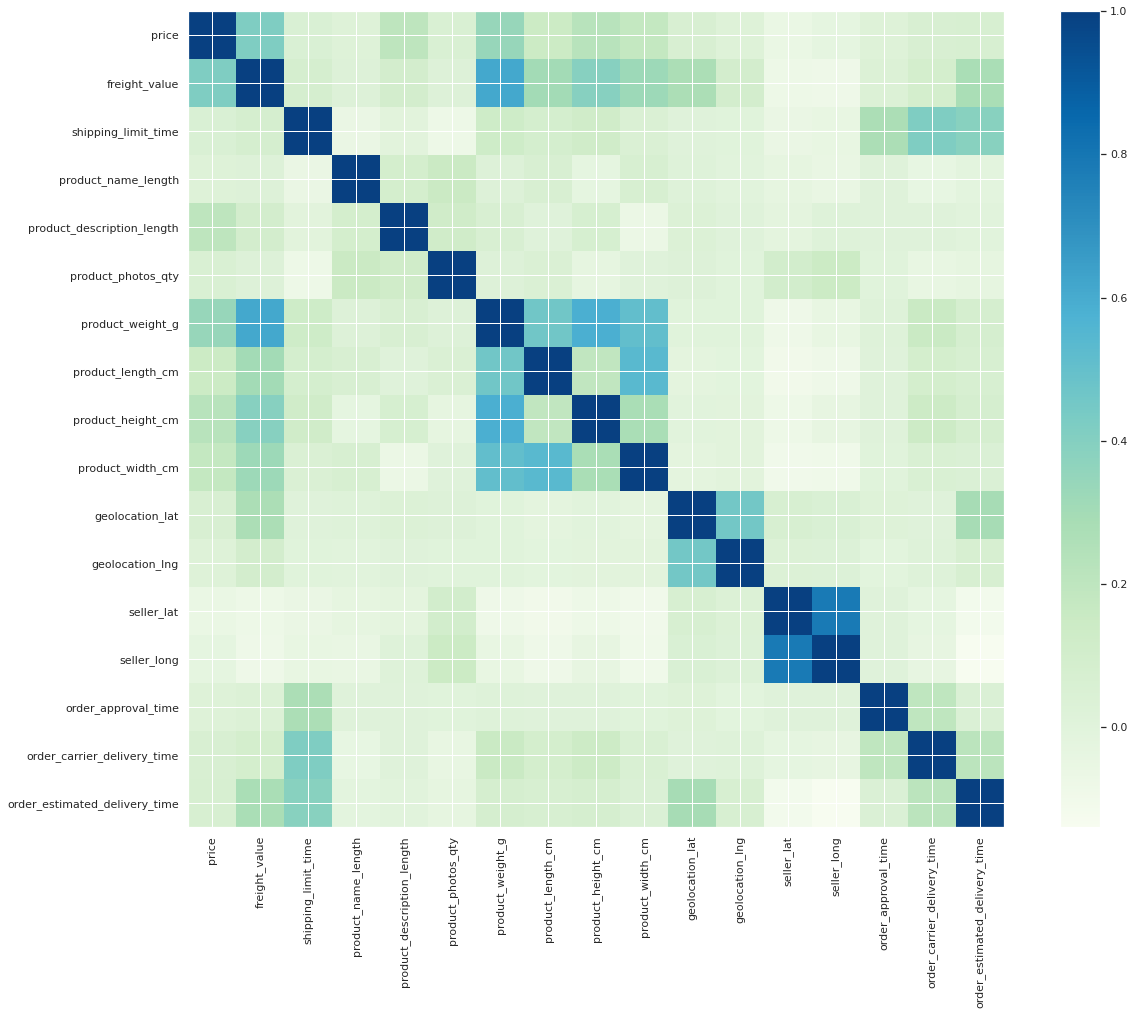

In [259]:
plt.figure(figsize=(20,15))
plt.imshow(dataset.corr(), cmap=plt.cm.GnBu,interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(dataset.columns))]
plt.xticks(tick_marks, dataset.columns, rotation=90)
plt.yticks(tick_marks, dataset.columns, rotation=0)
plt.show()

## Prediction using Different Regression Models

In [260]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr=model_lr.predict(X_test)
y_pred_lr_train = model_lr.predict(X_train)
print('Linear Regression R2Score :',r2_score(y_test,y_pred_lr))
print('RMSE Test:',sqrt(mean_squared_error(y_pred_lr_train,y_train)))
print('RMSE Train:',sqrt(mean_squared_error(y_pred_lr,y_test)))

Linear Regression R2Score : 0.3016888858464444
RMSE Test: 0.04807409323997109
RMSE Train: 0.048175273337098534


In [261]:
model_kn = KNeighborsRegressor(n_neighbors=15,weights='distance')
model_kn.fit(X_train, y_train)
y_pred_kn=model_kn.predict(X_test)
y_pred_kn_train = model_kn.predict(X_train)
print('NearestNeighbors R2Score :',r2_score(y_test,y_pred_kn))
print('RMSE Test:',sqrt(mean_squared_error(y_pred_kn_train,y_train)))
print('RMSE Train:',sqrt(mean_squared_error(y_pred_kn,y_test)))

NearestNeighbors R2Score : 0.4990157225179137
RMSE Test: 2.6435270141888353e-18
RMSE Train: 0.040804847450399126


In [262]:
model_dt = DecisionTreeRegressor(max_depth=15, random_state=42,min_samples_split = 5,min_samples_leaf = 1)
model_dt.fit(X_train, y_train)
y_pred_dt=model_dt.predict(X_test)
y_pred_dt_train = model_dt.predict(X_train)
print('DecisionTreeRegressor R2Score :',r2_score(y_test,y_pred_dt))
print('RMSE Test:',sqrt(mean_squared_error(y_pred_dt_train,y_train)))
print('RMSE Train:',sqrt(mean_squared_error(y_pred_dt,y_test)))

DecisionTreeRegressor R2Score : 0.4891329223663653
RMSE Test: 0.029275641068437677
RMSE Train: 0.04120535577353469


In [263]:
model_gb = GradientBoostingRegressor(n_estimators=750,random_state=42,learning_rate=0.5,max_depth=15,min_samples_split = 5,min_samples_leaf = 1)
model_gb.fit(X_train, y_train)
y_pred_gb=model_gb.predict(X_test)
y_pred_gb_train = model_gb.predict(X_train)
print('GradientBoostingRegressor R2Score :',r2_score(y_test,y_pred_gb))
print('RMSE Test:',sqrt(mean_squared_error(y_pred_gb_train,y_train)))
print('RMSE Train:',sqrt(mean_squared_error(y_pred_gb,y_test)))

GradientBoostingRegressor R2Score : 0.5895496556523228
RMSE Test: 0.0003162132964602538
RMSE Train: 0.0369343127621319


In [264]:
model_rf = RandomForestRegressor(max_depth=15, random_state=42,min_samples_split = 5,min_samples_leaf = 1)
model_rf.fit(X_train, y_train)
y_pred_rf=model_rf.predict(X_test)
y_pred_rf_train = model_rf.predict(X_train)
print('RandomForestRegressor R2Score :',r2_score(y_test,y_pred_rf))
print('RMSE Test:',sqrt(mean_squared_error(y_pred_rf_train,y_train)))
print('RMSE Train:',sqrt(mean_squared_error(y_pred_rf,y_test)))

RandomForestRegressor R2Score : 0.62248931145617
RMSE Test: 0.02772049678975935
RMSE Train: 0.03542128697550644


## Conclusion: 

**We have achieved an accuracy of 62.2% and also there is no overfitting since RMSE of test data and train data are similiar**

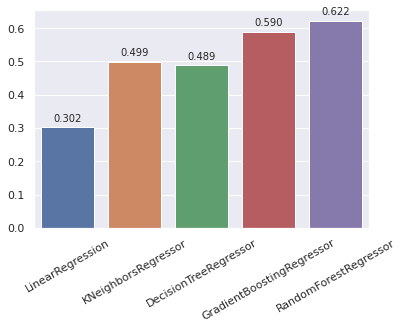

In [265]:
pred_arrays = [y_pred_lr,y_pred_kn,y_pred_dt,y_pred_gb,y_pred_rf]
predictors = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','GradientBoostingRegressor','RandomForestRegressor'] 
r2scores = []
for i in pred_arrays:
  r2scores.append(r2_score(y_test,i))
comp = sns.barplot(x=predictors, y=r2scores)
comp.set_xticklabels(comp.get_xticklabels(),rotation=30)
for p in comp.patches:
    comp.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()